## 🚩 Objective 2:
### Create a Model that Predicts if a person will go bald

**Import the cleaned dataset from the previous notebook:**

In [23]:
import pandas as pd
hair_df = pd.read_csv('datasets/cleaned_hair.csv')
hair_df.drop(['Unnamed: 0'], inplace = True, axis = 1)
df = hair_df.copy()
hair_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


**Preprocess data by encoding categorical data into numerical data:**
- This is important because machine learning models use numbers thus the need for preprocessing

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

X = hair_df.drop(['hair_loss', 'id'], axis = 1)
y = hair_df['hair_loss']

ordinal_cols = ['stress']
nominal_cols = ['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']

preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']]), ordinal_cols),
    ('nominal', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
], remainder='passthrough')

# Fit and transform
X_cat_encoded = preprocessor.fit_transform(X)

# Get feature names
column_names = preprocessor.get_feature_names_out()

# Create dataframe
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=column_names)

In [25]:
X_cat_encoded_df.head()

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin D Deficiency,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0


The above table shows the first five rows of a transformed hair dataset (`hair_df`). What happened:
1. The nominal data `['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']` have been transformed to have their own columns for each of their value while dropping the last value to avoid redundancy.
2. The ordinal data `['stress']` has also been transformed to represent each of its value with corresponding numerical values

In [26]:
# copy the dataset for future use
ml_hair_df = X_cat_encoded_df.copy()
ml_hair_df['hair_loss'] = y
ml_hair_df.head()

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss,hair_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0,0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,1


**Preprocess data by scaling numerical data:**
- This is important because features on a larger scale can disproportionately influence the model hence the normalization or standardization of the features (numerical)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X = ml_hair_df.drop('hair_loss', axis = 1)
y = ml_hair_df['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale_cols = ['remainder__age', 'ordinal__stress']
rest_cols = [col for col in X.columns if col not in scale_cols]

preprocessor = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), scale_cols)
], remainder='passthrough')

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

**The above table shows the first five rows of a scaled hair dataset (hair_df). What happened:**
1. The datasets are splitted into training and testing 
2. The columns `['ordinal__stress', 'remainder__age']` have been scaled which means transforming features to be on the same scale or range. This is done to ensure that no feature dominates another due to differences in their units or magnitude
3. This also makes the use of some machine learning models possible for some of them performs best when data are scaled

**Scale the dataframe for models that need scaling:**
- Models that need scaling include:
  - Logistic Regression
  - KNN

**Keep the dataframe for models that do not need scaling:**
- Models that need scaling include:
  - Decision Tree Classifier
  - Random Forest Classifier

**Evaluate the better model that uses scaled data:**
- This is important so that for future use only one model can be used for prediction or for fine tuning

In [28]:
# Train the dataset
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

models = {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression()}
results = []

for model in models.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'accuracy'))

scaled_scores = []
for i in range(2):
    print(f"Accuracy mean from all the folds ({list(models.keys())[i]}): {results[i].mean()}")
    scaled_scores.append(results[i].mean())

scaled_prediction_scores = []
print("\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = round(model.score(X_test_scaled, y_test), 2)
    print(name + " against testing dataset: " + str(test_score))
    scaled_prediction_scores.append(test_score)

Accuracy mean from all the folds (KNN): 0.5106761006289308
Accuracy mean from all the folds (Logistic Regression): 0.47061320754716973


KNN against testing dataset: 0.51
Logistic Regression against testing dataset: 0.47


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models_unscaled = {"DTC": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier()}

for model in models_unscaled.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy'))

unscaled_scores =[]
for i in range(2, 4):
    print(f"Accuracy mean from all the folds ({list(models_unscaled.keys())[i - 2]}): {results[i].mean()}")
    unscaled_scores.append(results[i].mean())
    
print("\n")

unscaled_prediction_scores = []
for name, model in models_unscaled.items():
    model.fit(X_train, y_train)
    test_score = round(model.score(X_test, y_test), 2)
    unscaled_prediction_scores.append(test_score)
    print(name + " against testing dataset: " + str(test_score))

Accuracy mean from all the folds (DTC): 0.4794654088050315
Accuracy mean from all the folds (Random Forest): 0.5018867924528302


DTC against testing dataset: 0.52
Random Forest against testing dataset: 0.48


In [30]:
scaled_model_name = list(models.keys())
unscaled_model_name = list(models_unscaled.keys())

models_names = pd.Series(scaled_model_name + unscaled_model_name) 
prediction_scores = pd.Series(scaled_prediction_scores + unscaled_prediction_scores)
scores = list(scaled_scores + unscaled_scores)
scores = pd.Series([round(float(score), 2) for score in scores])

print(models_names)
print(scores)
print(prediction_scores)

0                    KNN
1    Logistic Regression
2                    DTC
3          Random Forest
dtype: object
0    0.51
1    0.47
2    0.48
3    0.50
dtype: float64
0    0.51
1    0.47
2    0.52
3    0.48
dtype: float64


In [31]:
df_scores = pd.DataFrame({
    'Model': models_names,
    'Score': scores,
    'Prediction Score': prediction_scores
})

df_scores

,Model,Score,Prediction Score
0,KNN,0.51,0.51
1,Logistic Regression,0.47,0.47
2,DTC,0.48,0.52
3,Random Forest,0.50,0.48


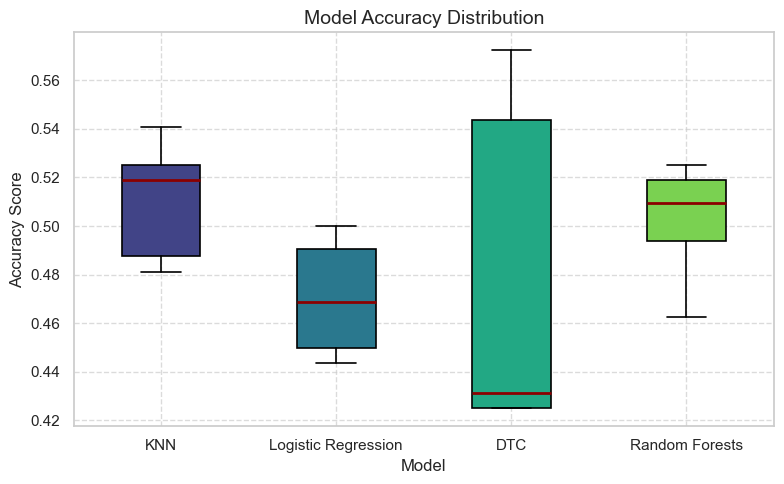

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.boxplot(results, tick_labels = ['KNN', 'Logistic Regression', 'DTC', 'Random Forests'])
# plt.show()

# Optional: Set global Seaborn style
sns.set(style="whitegrid")

# Define colors using viridis palette
colors = sns.color_palette("viridis", len(results))

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(
    results,
    patch_artist=True,  # allows color fill
    tick_labels=['KNN', 'Logistic Regression', 'DTC', 'Random Forests']
)

# Style each box with viridis colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Style whiskers, caps, medians
for whisker in box['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.2)

for cap in box['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.2)

for median in box['medians']:
    median.set_color('darkred')
    median.set_linewidth(2)

# Add title and axis labels
ax.set_title("Model Accuracy Distribution", fontsize=14)
ax.set_ylabel("Accuracy Score", fontsize=12)
ax.set_xlabel("Model", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Observation:**

Four machine learning models were evaluated to identify key features determining baldness: KNN, Logistic Regression, Decision Tree Classifier (DTC), and Random Forest. Based on both cross-validation accuracy and testing accuracy, KNN and Random Forest consistently achieved the highest performance (both 0.51), while Logistic Regression had the lowest accuracy (0.47). Although DTC showed a wider range of accuracy scores, its performance was unstable with high variance across folds, suggesting inconsistency.


---

## 🚩 Objective 3
### Get the Feature importance

Given that the highest model for accuracy is the Random Forest Classifier, it has been used as the model to determine the feature importance which uses impurity reduction, typically **Gini importance.**

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_  # array of importance scores

In [34]:
import numpy as np
feature_names = np.array(ml_hair_df.columns)
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_names = feature_names[sorted_indices]

In [35]:

# Used if want to see the importances of all the features
# plt.figure(figsize=(10, 6))
#
# sns.barplot(x=sorted_importances, y=sorted_names, palette='viridis', hue = sorted_importances, legend = False)
#
#
# plt.xlabel("Importance Score", fontsize=12)
# plt.ylabel("Feature", fontsize=12)
# plt.title("Feature Importance", fontsize=14)
#
# plt.xticks(rotation=45, ha='right')
# # plt.tight_layout()
#
# # plt.show()

In [36]:
import re
regex = r'\w+__'

sorted_importances_10 = sorted_importances[:11]
sorted_names_10 = sorted_names[:11]

sorted_names_10 = [re.sub(regex, '', label).replace('_', ' ').title() for label in sorted_names_10]

importance_df = {
'Feature': sorted_names_10,
'Absolute Mean Decrease Gini (Importance)': sorted_importances_10 
}

pd.DataFrame(importance_df)

,Feature,Absolute Mean Decrease Gini (Importance)
0,Age,0.167018
1,Stress,0.062153
2,Hormonal Changes,0.044922
3,Environmental Factors,0.041666
4,Weight Loss,0.038480
5,Genetics,0.037107
6,Poor Hair Care Habits,0.036763
7,Smoking,0.036023
8,Nutritional Deficiencies Vitamin D Deficiency,0.021590
9,Medications And Treatments Chemotherapy,0.021029


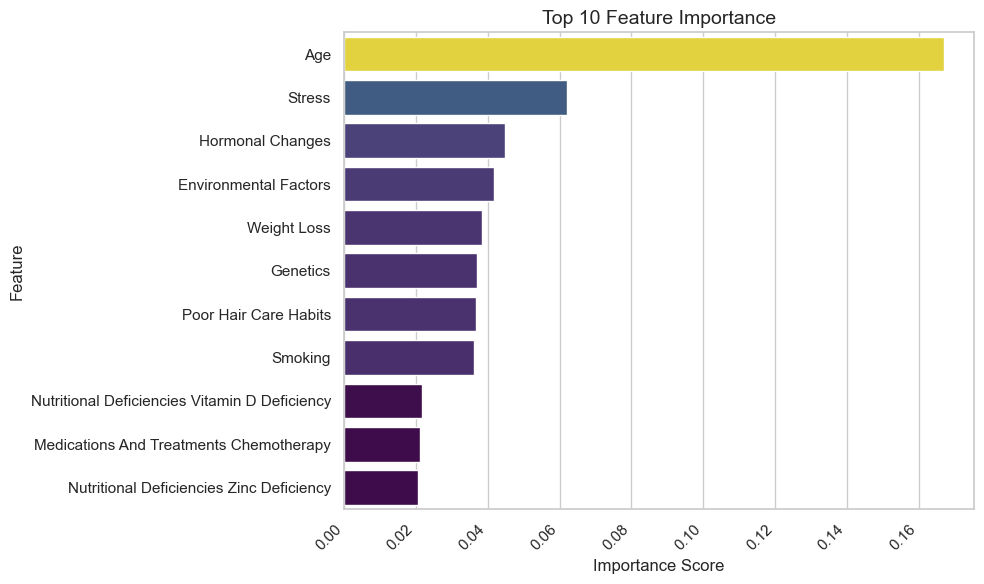

In [37]:
plt.figure(figsize=(10, 6))

sns.barplot(x=sorted_importances_10, y=sorted_names_10, palette='viridis', hue = sorted_importances_10, legend = False)

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Feature Importance", fontsize=14)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

plt.show()

### Observations:



Our **Random Forest model** identified **Age as the overwhelmingly most important factor in predicting hair loss**, with an importance score of 0.167. This score is significantly higher than any other feature, strongly suggesting that **age-related biological processes are fundamental to hair loss progression** within our dataset.

**Stress** emerged as the **second most influential feature**, with an importance score of 0.062. This finding aligns with extensive research linking psychological stress to various hair shedding conditions, such as telogen effluvium. The prominence of both Age and Stress indicates that **both chronological maturation and an individual's psychological state are primary contributors** to hair loss at least in prediction models like Random Forest Classifier.

The analysis further showed that several other variables, including **Hormonal Changes, Environmental Factors, Weight Loss, Genetics, and Poor Hair Care Habits**, exert a **moderate, albeit lesser, influence** on hair loss prediction, with importance scores ranging from approximately 0.036 to 0.045. Their collective presence underscores the **multifactorial nature of hair loss**, suggesting that these diverse lifestyle and health-related factors contribute smaller, but still meaningful, effects.

Interestingly, factors like **nutritional deficiencies (specifically Vitamin D and Zinc) and chemotherapy treatments** appeared at the lower end of our top 10 most important features. While their overall importance in the general dataset seems relatively low, their inclusion among the top predictors implies they can still play a **significant role, particularly in specific subpopulations or individual cases** where these factors are more pronounced.

---

## 🚩 Objective 4:
### Calculate the relationship of the features to baldness of the participants

In [38]:
from scipy.stats import pointbiserialr, mannwhitneyu, chi2_contingency

In [39]:
hair_correlation_df = hair_df.copy()

In [40]:
hair_correlation_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


**Functions:**
- These are the functions that will be used for each feature to be able to calculate their measures of association or correlation

| Variable | Level of Measurement | Measure of Association |
|---|---|---|
| Age | Continuous | Point-biserial correlation |
| Stress | Ordinal | Rank-biserial correlation |
| Medical Conditions | Nominal (>2 categories) | Cramer's V |
| Medications & Treatments | Nominal (>2 categories) | Cramer's V |
| Nutritional Deficiencies | Nominal (>2 categories) | Cramer's V |
| Genetics | Nominal (binary) | Phi (φ) coefficient |
| Hormonal Changes | Nominal (binary) | Phi (φ) coefficient |
| Poor Hair Care Habits | Nominal (binary) | Phi (φ) coefficient |
| Environmental Factors | Nominal (binary) | Phi (φ) coefficient |
| Smoking | Nominal (binary) | Phi (φ) coefficient |
| Weight Loss | Nominal (binary) | Phi (φ) coefficient |

**Age:**

Using the formula:
$$r_{pb} = \frac{\overline{Y}_1 - \overline{Y}_0}{s_y} \sqrt{\frac{N_0 N_1}{N(N-1)}}$$
We can calculate the correlation of **continuous - nominal (0/1)**.


In [41]:
results = {}

# Age - hair_loss  (point-biserial = Pearson on [0/1] x continuous)
r_age, _ = pointbiserialr(hair_correlation_df["hair_loss"], hair_correlation_df["age"])
results["Age"] = r_age

**Stress:**

Using the formula **(rank-biserial correlation)**:
$$r_{rb} = 1 - \frac{2U}{n_1 n_2}$$
We can calculate the correlation of **ordinal - nominal (0/1)**.


In [42]:
def rank_biserial(x, g):
    """
    Rank-biserial correlation (ordinal vs binary)
    x : ordinal numeric series
    g : binary group labels (0/1)
    """
    u, _  = mannwhitneyu(x[g == 0], x[g == 1], alternative="two-sided")
    n1, n2 = (g == 0).sum(), (g == 1).sum()
    return 1 - (2 * u) / (n1 * n2)

stress_map = {"Low": 0, "Moderate": 1, "High": 2}
hair_correlation_df["stress_rank"] = hair_correlation_df["stress"].map(stress_map)

# Stress (ordinal) - hair_loss  (rank‑biserial)
results['Stress'] = rank_biserial(hair_correlation_df["stress_rank"], hair_correlation_df["hair_loss"])

**Medical Conditions, Medications and Treatments, & Nutritional Deficiencies:**

Using the formula:
$$V = \sqrt{\frac{\chi^2}{n \cdot \min(r-1, c-1)}} \, ; \, \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$
We can calculate the correlation of **Nominal > 2 - nominal (0/1)**.

In [43]:
def cramers_v(table: pd.DataFrame) -> float:
    """Cramér’s V for nominal×binary (or nominal×nominal)"""
    chi2 = chi2_contingency(table, correction=False)[0]
    n    = table.to_numpy().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

nominal_multi = [
    "medical_conditions",
    "medications_and_treatments",
    "nutritional_deficiencies",
]
for col in nominal_multi:
    results[col] = cramers_v(pd.crosstab(hair_correlation_df[col], hair_correlation_df["hair_loss"]))

**Genetics, Hormonal Changes, Poor Hair Care Habits, Environmental Factors, Smoking & Weight Loss:**

Using the formula:
$$\phi = \frac{ad-bc}{\sqrt{(a+b)(c+d)(a+c)(b+d)}}$$
We can calculate the correlation of **nominal (0/1) - nominal (0/1)**.

In [44]:
# Binary - hair_loss  (φ)
def phi_coeff(table: np.ndarray) -> float:
    (a, b), (c, d) = table
    return (a*d - b*c) / np.sqrt((a+b)*(c+d)*(a+c)*(b+d))

binary_cols = [
    "genetics", "hormonal_changes", "poor_hair_care_habits",
    "environmental_factors", "smoking", "weight_loss"
]
for col in binary_cols:
    results[col] = phi_coeff(pd.crosstab(hair_correlation_df[col], hair_correlation_df["hair_loss"]).to_numpy())

In [47]:
corr = (
    pd.Series(results, name="Correlation with Hair Loss")
      .sort_values(key=abs, ascending=False)
      .to_frame()
)
corr.index = [idx.replace('_', ' ').title() for idx in corr.index]
corr.reset_index(inplace = True)
corr.columns = ['Feature', 'Correlation with Hair Loss']
corr

,Feature,Correlation with Hair Loss
0,Medical Conditions,0.099107
1,Age,-0.062481
2,Medications And Treatments,0.060735
3,Nutritional Deficiencies,0.058510
4,Smoking,-0.056906
5,Weight Loss,0.044838
6,Genetics,0.041309
7,Poor Hair Care Habits,-0.039119
8,Environmental Factors,-0.018937
9,Hormonal Changes,0.007104


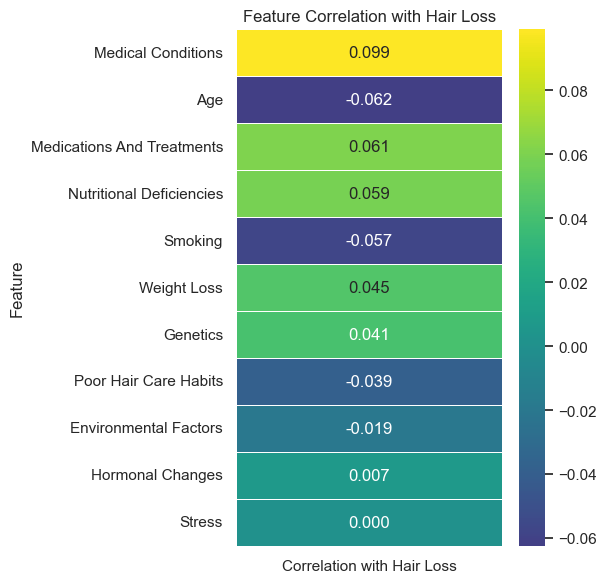

In [48]:
# Set figure size and plot heatmap
corr.set_index('Feature', inplace=True)
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='viridis', center=0, cbar=True, linewidths=0.5, fmt=".3f")

plt.title('Feature Correlation with Hair Loss')
plt.tight_layout()
plt.show()

**Correlation Results:**

| **Variable** | **Correlation/Association Strength** | **Implication/Note** |
|---|---|---|
| **Medical Conditions** | Strongest positive association (Cramér’s V = 0.099) | Suggests some influence of underlying health issues on hair loss; effect size is weak. |
| **Age** | Weak negative correlation (r = –0.062) | Implies slightly more hair loss among younger individuals; may reflect sampling bias or dataset-specific trends. |
| **Medications & Treatments** | Weakly positively associated (Cramér’s V = 0.061) | Possible influence from side effects of certain medications. |
| **Nutritional Deficiencies** | Weakly associated (Cramér’s V = 0.059) | Aligns with existing knowledge on hair health and nutrient deficiencies. |
| **Smoking** | Weak negative correlation (φ = –0.057) | Unexpected; may be due to confounding variables or reporting bias. |
| **Weight Loss** | Weak positive association (φ = 0.045) | Could indicate stress or nutritional changes impacting hair health. |
| **Genetics** | Very weak correlation (φ = 0.041) | Likely underestimates the role due to binary simplification of data. |
| **Poor Hair Care Habits** | Weak negative correlation (φ = –0.039) | Suggests limited impact in isolation. |
| **Environmental Factors** | Very minimal association (φ = –0.019) | May contribute indirectly or in interaction with other factors. |
| **Hormonal Changes** | Extremely weak positive correlation (φ = 0.007) | Likely underrepresented in binary format. |
| **Stress** | No meaningful association found (r = 0.00005) | Suggests that self-reported stress levels may not accurately reflect hair-related stress effects. |

**Implications:**
* Our dataset shows a **complex and fragmented picture of hair loss**, not a simple one.
* **Medical conditions, treatments, and nutritional deficiencies** are seen more often in individuals with hair loss, but their impact is generally **modest**.
* Surprisingly, factors commonly thought to be major contributors, like **genetics, stress, and hormonal changes**, show **little to no association** in our data.
    * This could be due to **oversimplified data encoding**, **inaccurate self-reporting**, or **limitations in the dataset's size or representativeness**.
* The **weak inverse relationship with age** (more hair loss in younger individuals) likely stems from **sampling biases or specific trends** within this dataset, rather than a direct biological link.
* Overall, the **absence of strong, clear patterns** suggests that hair loss in this sample is probably caused by a **combination of many minor, interacting factors**, rather than one dominant cause.
    * This complexity also made it **difficult for machine learning models to predict hair loss with high accuracy**.

## 5. Conclusion and Recommendation

### Conclusion

#### Objective 1 – Factors Associated with Hair Loss

- **Age-related trends**:
  - Participants with hair loss were slightly younger on average than those without.
  - Hair loss peaked at age **29**, whereas no hair loss peaked at age **50**.
  - This indicates that hair loss may begin earlier and that age alone is **not a strong predictor**.

- **Hair care habits**:
  - Slightly more participants **without** hair loss reported **poor hair care habits**.
  - The minimal difference suggests poor hair care **does not directly cause hair loss**.

- **Environmental exposure**:
  - Both groups had nearly equal exposure to environmental factors.
  - Indicates **limited or indirect influence** of environment on hair loss.

- **Smoking habits**:
  - More **non-hair loss** participants were **smokers**.
  - Contradicts the assumption that smoking increases hair loss risk, **relationship may be more complex**.

- **Weight loss**:
  - Slightly more participants with hair loss experienced **weight loss**.

- **Stress levels**:
  - Both groups experienced similar **high stress** levels.
  - However, **moderate stress** was more common among the hair loss group.

- **Hormonal changes**:
  - Both groups reported similar experiences with hormonal imbalance.
  - Suggests hormones **may influence** but are **not a distinguishing factor**.

- **Medical conditions**:
  - **Alopecia Areata** was the most common among hair loss participants.
    
- **Treatments used**:
  - **Steroids and Rogaine** were the most reported treatments.
  - Reflects use of both **topical and systemic approaches**.

- **Nutritional deficiencies**:
  - **Vitamin D deficiency** was the most reported.
  - Emphasizes a potential link between **nutrition and hair health**.


#### Objective 2 - Creation and Evaluating ML Models to Identify Key Features

- **Models Evaluated**:
  - Four models were tested: **KNN**, **Logistic Regression**, **Decision Tree Classifier (DTC)**, and **Random Forest**.

- **Top-performing models**:
  - **KNN** and **Random Forest** both achieved the highest **cross-validation and testing accuracy** of **0.51**.
  - These models were the **most consistent** in performance across the dataset.

- **Lowest-performing model**:
  - **Logistic Regression** had the **lowest accuracy** at **0.47**.
  - Indicates it may not capture the underlying patterns in the data effectively.

- **Decision Tree Classifier (DTC)**:
  - Displayed **high variance** across cross-validation folds.
  - While capable of higher scores at times, it was generally **unstable and inconsistent**.


#### Conclusion: Objective 3 – Identifying Key Predictive Features Using Random Forest

- **Top feature: Age**
  - Had the highest importance score: **0.167**.
  - Strongly suggests that **age-related biological processes** are key in hair loss prediction.
  
- **Second most important: Stress**
  - Importance score: **0.062**.
  - Supports the established link between **psychological stress and hair shedding conditions** like telogen effluvium.
  - Highlights the role of **both biological aging and psychological health** in hair loss.

- **Moderate contributing factors** (importance scores ~0.036 to 0.045):
  - **Hormonal Changes**
  - **Environmental Factors**
  - **Weight Loss**
  - **Genetics**
  - **Poor Hair Care Habits**
  - These factors contribute **smaller but meaningful effects**, reinforcing that hair loss is **multifactorial**.

- **Lower-ranked but notable predictors**:
  - **Nutritional deficiencies** (Vitamin D, Zinc)
  - **Chemotherapy treatments**
  - Though their importance scores are lower, their appearance in the **top 10 features** suggests they may play **critical roles in specific cases or subpopulations**.


#### Objective 4 - Strength of Association Between Features and Hair Loss

- **Medical conditions** showed the **strongest positive association** (Cramér’s V = 0.099), but the effect size remains **weak**, highlighting modest influence.
- **Age** had a **slight negative correlation** (r = –0.062), indicating more hair loss among younger individuals—likely due to **sampling bias** rather than biology.
- **Medications, nutritional deficiencies, and weight loss** were weakly associated with hair loss, aligning with prior knowledge but showing only **modest impact**.
- **Surprisingly weak or no association** was found for **genetics**, **stress**, **hormonal changes**, and **environmental factors**, possibly due to **binary encoding**, **self-reporting issues**, or **dataset limitations**.

Overall, the results reveal a **fragmented and complex picture**, where no single factor shows strong influence. Hair loss in this dataset appears to result from a **blend of many small, interacting factors**, making high prediction accuracy difficult for machine learning models.


### Recommendation


#### Recommendation 1
- **Incorporate More Discriminative Features:**<br>
    - The current dataset relies on self-reported lifestyle, stress, and environmental factors, which may be too broad or weakly linked to hair loss. Adding more specific variables, such as scalp examination results, hormone levels, or hair follicle density, could improve model signal.

#### Recommendation 2
- **Leverage Biological and Clinical Markers:**<br>
    - Rather than relying purely on statistical correlations, future studies should integrate biomarkers and clinical diagnostics (e.g., DHT levels, thyroid function, autoimmune panels) that are known to influence hair loss physiologically.

#### Recommendation 3
- **Use Longitudinal or Temporal Data:**<br>
    - Hair loss is progressive. A time-series or before-after treatment dataset would help distinguish causes from effects which mitigates reverse causality seen in features like “Rogaine.”

#### Recommendation 4
- **Employ Natural Language Models for Deeper Insights:**<br>
    - Large Language Models (LLMs) can help bridge gaps between raw data and domain knowledge such as interpreting free-text symptoms, matching patterns to dermatology literature, or generating hypotheses grounded in human biology rather than just numeric trends.

## 6. References:

- https://journals.sagepub.com/doi/10.1177/8756479308317006
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html
- https://www.statisticshowto.com/rank-biserial-correlation/
- https://statisticseasily.com/mann-whitney-u-test/
- https://journals.sagepub.com/doi/epub/10.2466/11.IT.3.1
- https://www.sciencedirect.com/science/article/abs/pii/S1226319212001032